In [3]:
%matplotlib inline
import importlib as imp
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');

# Adjust all text and axes colors to black. default is some studip gray that appears to faint when printed 
from matplotlib import rc , rcParams
rc('axes',edgecolor='black')
rc('xtick',color='black',labelsize=15)
rc('ytick',color='black',labelsize=15)
rc('text',color='black')
rc('axes',labelcolor='black',linewidth=2.0)
rc('font',size=15)
#rcParams["patch.force_edgecolor"] = True

import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
imp.reload(CalcABA);
import plotting_ABA_Diewertje as pltABA
imp.reload(pltABA);
import plotting_Boyle_Diewertje as plt_B
imp.reload(plt_B);

import sys 
sys.path.append('../code_general/')
import CRISPR_free_energy_landscape_Diewertje as FreeEnergy
imp.reload(FreeEnergy);
import read_model_ID;
imp.reload(read_model_ID);

import sys 
sys.path.append('../code_general_Finkelsteinlab/')
import plotting_Finkelsteinlab as plt_F
imp.reload(plt_F)


import analysis_SA_fits_Diewertje as SAfits
imp.reload(SAfits);



In [4]:
simset3 = []
no_good = []
# Used concentrations: [10,100]
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,25):
    sa = pd.read_csv('../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_' +str(sim)+'.txt', delimiter='\t', index_col=45)
    filename = '../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset3.append(filename)
        
    
best_fit_conc3 = simset3[np.argmin(chi_squared)]
best_fit_conc3

'../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_10.txt'

In [5]:
print('The chi-squared of the best fit is:',chi_squared[0])

The chi-squared of the best fit is: 66822.59581679999


In [6]:
# Load data
import Prepare_data_Simple as Pre
rawABA=pd.read_csv('../Data_ABA_Finkelsteinlab/TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
rawABA

# prepare data
import Prepare_data_Simple as pre
xdata,ydata,yerr=pre.Prepare_Cdata('../Data_ABA_Finkelsteinlab/','TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')


In [6]:
rawABA

,sequence,ABA,error,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions
0,AAAAGACGCATAAAGATGAGACGCTGG,2.451314,0.120136,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
1,AAATCACGCATAAAGATGAGACGCTGG,2.465621,0.050944,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n|||||||||||||||||||.\r...,CGCAGAGTAGAAATACGCAG-\r\n||||||||||||||||||| ...,r:20:C,r,1.0,20
2,AAATCTCGCATAAAGATGAGACGCTGG,2.660628,0.060161,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||..\r...,CGCAGAGTAGAAATACGCAG--\r\n|||||||||||||||||| ...,r:19:T|r:20:C,r,2.0,19|20
3,AAATGACGCATAAAGATGAGACGCTGG,2.531423,0.061229,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
4,AATAGACGCATAAAGATGAGACGCTGG,2.626618,0.052173,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
5,ACTAGACGCATAAAGATGAGACGCTGG,2.780461,0.036286,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
6,AGTAGACGCATAAAGATGAGACGCTGG,2.640303,0.041959,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
7,ATAAGACGCATAAAGATGAGACGCTGG,2.612687,0.066341,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
8,ATCAGACGCATAAAGATGAGACGCTGG,2.683235,0.047547,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
9,ATGAGACGCATAAAGATGAGACGCTGG,2.668154,0.040950,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN


The min amount of measurments is:  9
The max amount of measurments is:  51


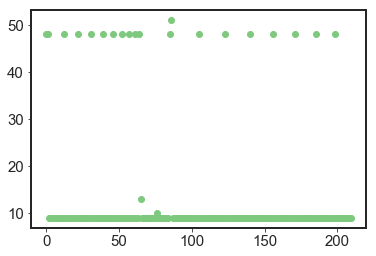

In [9]:
# to see if we have the same amount of measurements per position
measurements=[]
for i in range(len(ydata)):
    measurements.append(len(ydata[i]))
plt.scatter(range(len(ydata)),measurements)
print('The min amount of measurments is: ',min(measurements))
print('The max amount of measurments is: ',max(measurements))

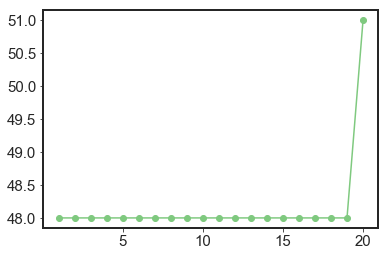

In [10]:
PosSingle=[]
MeasSingle=[]
for i in range(len(xdata)):
    if (len(xdata[i])==1):
        PosSingle.append(xdata[i])
        MeasSingle.append(len(ydata[i]))
MeasSingle_ordered=np.empty(len(PosSingle)+1)
for i in range(1,len(MeasSingle)+1):
    MeasSingle_ordered[PosSingle[i-1]]=MeasSingle[i-1]
plt.plot(range(1,21),np.array(MeasSingle_ordered[1:]),marker='o')

In [8]:
# Load Parameters to calculate the chi-squared for best fit
import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([1,30,100])
Param_conc3=getParm.load_simm_anneal(best_fit_conc3,Nparams)

ontarget ABA is: 2.5545002878227865
[2.1259863  1.4559757  2.01195537 2.11969289 1.85827735 2.12978785
 1.97983649 1.01892506 1.67299118 0.71720788 0.74579031 0.53679522
 0.48698013 0.49357553 0.41592626 0.34141384 0.27989835 0.21115186
 0.25555834 0.10819611]


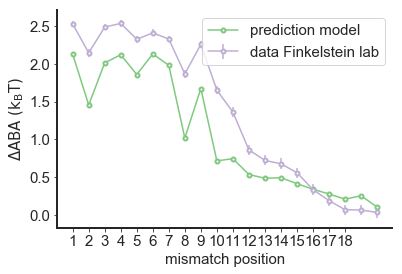

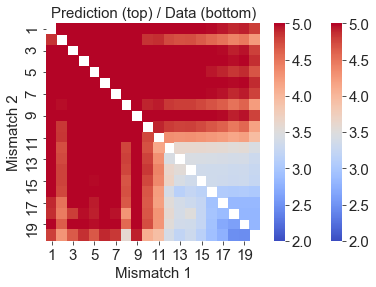

In [9]:
import plotting_simple_fit as pltS
T=60*10
guide_length=20
model_id = 'general_energies_no_kPR'

plt.figure()
_ = pltS.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)


plt.figure()
best_heatmap = pltABA.predict_double_mm(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=True, data_file=rawABA)

# Cannot do those plots, because do not have block data
# plt.figure()
# _ = pltABA.predict_1D_mmblocks(Param_normal, model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
# plt.figure()
# _ = pltABA.predict_block_mismatches(Param_normal, model_id, T,guide_length, show_plot=True, show_data=True, data_file=rawABA)



C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


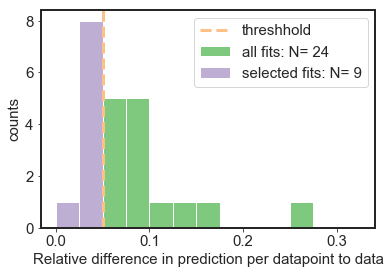

In [118]:
# This does exactly the same as above! To get scores
selected_sims, selected_scores, scores = SAfits.select_on_prediction(simset3, 
                                                         chi_squared, 
                                                         percentage=0.05,
                                                         Nparams=41,
                                                         model_id='general_energies_no_kPR',
                                                         precalculated=False, 
                                                         score=None,
                                                         save_scores=False, 
                                                         filename='../data/25_10_2018/select_with_predcitions.txt'
                                                         ) # do not use filename now

plt.hist(scores, normed=False, bins=np.arange(0,max(scores),0.025), label='all fits: N= ' +str(len(scores)))
plt.hist(selected_scores,normed=False, bins=np.arange(0,max(scores),0.025), label='selected fits: N= ' +str(len(selected_scores)));

plt.axvline(0.05, linestyle='dashed', linewidth=3, color=sns.color_palette()[2], label='threshhold')


plt.legend(fontsize=15);
plt.xlabel('Relative difference in prediction per datapoint to data', fontsize=15);
plt.ylabel('counts', fontsize=15);
plt.xticks(fontsize=15);

plt.yticks(fontsize=15);

# Still old way of selecting: based on the best fit.
# Not based on data

In [119]:
# --- make selection --- 
simset3 = selected_sims 

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset3,44,'general_energies_no_kPR')
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc[best_fit_conc3]

PAM    3.500000
1     -4.181529
2     -3.408062
3      3.127116
4     -0.211355
5     -0.303034
6      1.540037
7     -3.533614
8      1.456277
9     -0.533073
10     6.141990
11     0.936271
12    -0.656390
13    -0.567080
14    -4.867717
15     6.627549
16     0.731001
17    -1.974013
18    -5.258456
19     4.251418
20     6.151085
Name: ../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_10.txt, dtype: float64

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


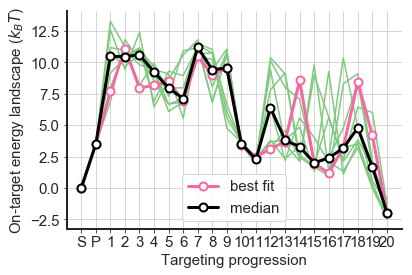

In [120]:
# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=41
for filename in simset3:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id='fixed_rates',show_plot=False);
    #plt.figure()
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )


plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
         marker='o',
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


# Now selection based on agreement with data

In [10]:
# select based on dataset instead of best fit:
selected_sims, selected_scores, scores = SAfits.select_on_prediction_WA(simset3,
                                                                        percentage=0.018,
                                                                        model_id='general_energies_no_kPR',
                                                                        path='../Data_ABA_Finkelsteinlab/',
                                                                        replica='TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
# replica is filename of the data in my case!

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


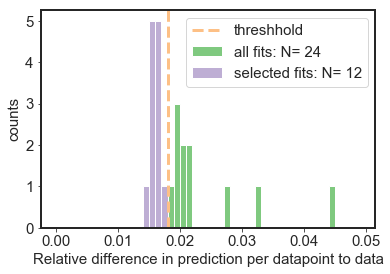

In [11]:
plt.hist(scores, normed=False, bins=np.arange(0,max(scores),0.001), label='all fits: N= ' +str(len(scores)))
plt.hist(selected_scores,normed=False, bins=np.arange(0,max(scores),0.001), label='selected fits: N= ' +str(len(selected_scores)));

plt.axvline(0.018, linestyle='dashed', linewidth=3, color=sns.color_palette()[2], label='threshhold')


plt.legend(fontsize=15);
plt.xlabel('Relative difference in prediction per datapoint to data', fontsize=15);
plt.ylabel('counts', fontsize=15);
plt.xticks(fontsize=15);

plt.yticks(fontsize=15);

# Plot of weighted average

In [243]:
#------------To plot weighted average--------
import os
import numpy as np
import pandas as pd
import Boyle_data_processing as process
import CRISPR_dCas9_binding_curve_Boyle as dCas9
import matplotlib.pylab as plt
import Prepare_data_Simple as prep

import Calculate_ABA_Finkelsteinlab_Diewertje as ABA

def Weighted_average(row):
    y = np.array(row['ydata'])
    e = np.array(row['yerr'])
    wa=np.average(y, weights=e ** -2, axis=0)
    return wa


def calc_Weighted_average(path='../Data_Boyle/', replica='1', outputdirectory='../Data_Boyle/Weighted_Avarage/',
                          save=True):
    # For me replica is the filename
    xdata, ydata, yerr = prep.Prepare_Cdata(path=path,filename=replica)
    data = pd.DataFrame(columns=['xdata', 'ydata', 'yerr'])
    data['xdata'] = xdata
    data['ydata'] = ydata
    data['yerr'] = yerr
    wa = []
    for i in data.index:
        wa.append(Weighted_average(data.loc[i]))
    WA = pd.DataFrame(columns=['MM_pos', 'WA_data'])
    WA.MM_pos = xdata
    WA.WA_data = wa
    return WA


def predict_train(parameters, model_id='general_energies_no_kPR', path='../Data_Boyle/', replica='1', Plot=True):
    wa = calc_Weighted_average(path=path, replica=replica, save=False)
    prediction=wa.copy()
    concentrations=np.array([0.1,0.3,1.,3.,10.,30.,100.,300.])
    reference=1
    prediction['WA_model']=wa['MM_pos'].apply(lambda x: ABA.calc_ABA(parameters,concentrations,reference,x.tolist(),model_id,guide_length=20,T=10*60))
    score = prediction.dropna().apply(lambda x: np.abs(x['WA_data'] - x['WA_model']) / x['WA_data'], axis=1).mean()
    corr=0
    return score, corr, prediction

percentage=0.1,
model_id='general_energies_no_kPR'
path='../Data_ABA_Finkelsteinlab/'
replica='TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv'

WA=calc_Weighted_average(path,replica,save=False)
WA['WA_data_delta']=WA['WA_data']-2.5545002878227865 
# substract ontarget to go to delta ABA


ontarget ABA is: 2.5545002878227865
[2.1259863  1.4559757  2.01195537 2.11969289 1.85827735 2.12978785
 1.97983649 1.01892506 1.67299118 0.71720788 0.74579031 0.53679522
 0.48698013 0.49357553 0.41592626 0.34141384 0.27989835 0.21115186
 0.25555834 0.10819611]


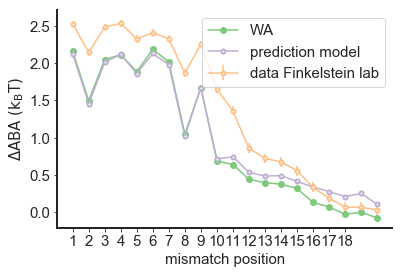

In [260]:
WAsingle=[]
singlePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==1):
        singlePos.append(WA['MM_pos'][i])
        WAsingle.append(WA['WA_data_delta'][i])

WAsingle_ordered=np.empty(len(WAsingle)+1)
for i in range(1,len(WAsingle)+1):
    WAsingle_ordered[singlePos[i-1]]=WAsingle[i-1]
len(WAsingle_ordered)
plt.figure()
plt.plot(range(1,21),WAsingle_ordered[1:],marker='o',label='WA')
_ = pltS.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
plt.legend()

Text(0.5, 1.0, 'Prediction (top) / WA (bottom)')

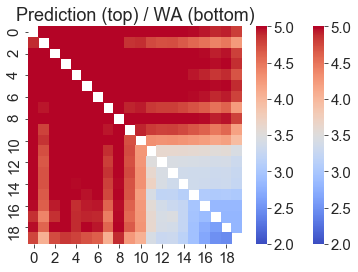

In [258]:
#-----For double mismatches-----
WAdouble=[]
doublePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==2):
        doublePos.append(WA['MM_pos'][i])
        WAdouble.append(WA['WA_data'][i])
mapABA=np.zeros([20,20])
mapABA[:]=np.nan
for i in range(len(doublePos)):
    mapABA[doublePos[i][0]-1,doublePos[i][1]-1]=WAdouble[i]

import seaborn as sns
plt.figure()
best_heatmap = pltABA.predict_double_mm(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)

sns.heatmap(mapABA.transpose(), cmap='coolwarm', cbar=True, vmin=2,vmax=5)
plt.title('Prediction (top) / WA (bottom)')

# To calculate the chisquared of WA compared to data

In [87]:
score,corr,prediction=predict_train(Param_conc3,
                                    model_id='general_energies_no_kPR',
                                    path=path,replica=replica,Plot=True)
prediction
parts=[]
for i in range(len(ydata)):
    parts.append(sum((np.array(ydata[i])-(prediction['WA_model'][i]*np.ones(len(ydata[i]))))**2/(np.array(yerr[i])**2)))
    
chi_squared_WA=sum(np.array(parts))

In [89]:
chi_squared_WA

66942.16112037186

In [136]:
np.abs(np.array(chi_squared)-chi_squared_WA)/chi_squared_WA

array([0.0017861 , 0.11118031, 0.05018384, 0.6182727 , 0.07302414,
       0.00549295, 0.03163201, 1.08136188, 0.01972656, 0.06427032,
       0.38689735, 0.04178487, 0.11266317, 0.05715894, 0.04304902,
       0.05762263, 0.0401525 , 0.03302182, 0.02502822, 0.01267543,
       0.01608059, 0.02360656, 0.04932639, 1.49502116])

# FROM NOW IT IS NORMAL CODE AGAIN

In [12]:
# --- make selection --- 
simset3 = selected_sims 

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset3,44,'general_energies_no_kPR')
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc[best_fit_conc3]

PAM    3.500000
1     -4.181529
2     -3.408062
3      3.127116
4     -0.211355
5     -0.303034
6      1.540037
7     -3.533614
8      1.456277
9     -0.533073
10     6.141990
11     0.936271
12    -0.656390
13    -0.567080
14    -4.867717
15     6.627549
16     0.731001
17    -1.974013
18    -5.258456
19     4.251418
20     6.151085
Name: ../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_10.txt, dtype: float64

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


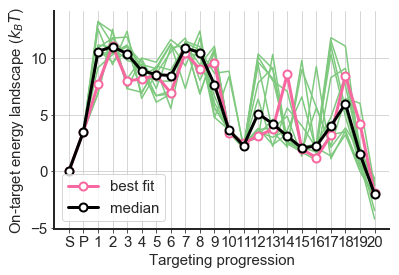

In [13]:
# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=41
for filename in simset3:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id='fixed_rates',show_plot=False);
    #plt.figure()
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )


plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
         marker='o',
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


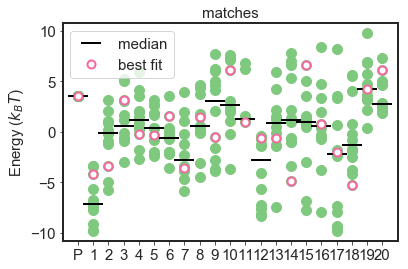

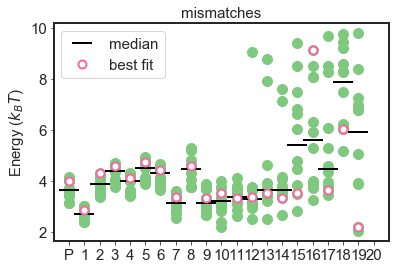

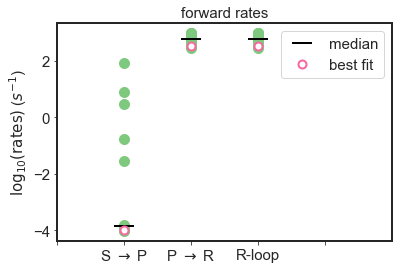

In [14]:
# ---- show fluctuations in parameter sets --- 
# THIS IS THE RESULT

# --- Matches ---
# MAYBE WE WANT TO NEGATE (multiply by -1 all the epsilonC to have the same sign convention as EpsilonPAM and EpsilonI)
plt.figure()
for sim in simset3:
    matches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

matches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    

matches.loc[best_fit_conc3].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('matches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);

# --- Mismatches --- 
plt.figure()
for sim in simset3:
    mismatches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

mismatches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    

mismatches.loc[best_fit_conc3].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('mismatches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);


# --- 10log of the forward rates --- 
plt.figure()
for sim in simset3:
    forward_rates.loc[sim].apply(np.log10).plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

forward_rates.median().apply(np.log10).plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    
    

forward_rates.loc[best_fit_conc3].apply(np.log10).plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('forward rates',fontsize=15)
plt.xticks(range(-1,4),['',r'S $\rightarrow$ P',r'P $\rightarrow$ R','R-loop',''],fontsize=15);
plt.xlim(-1,4);
plt.yticks(fontsize=15);
plt.ylabel(r'$\log_{10}(\rm{rates})$ ($s^{-1}$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);




In [15]:
forward_rates['PAM_to_R1'].mean()

621.6615479444603

In [16]:
forward_rates.loc[best_fit_conc3]

sol_to_PAM      0.000103
PAM_to_R1     326.091748
internal      326.091748
Name: ../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_10.txt, dtype: float64

# To compare with Boyle e-mailed file + rates

In [ ]:
# To load other paramter sets, to choose one with low Ksp, to see if that will give a good fit.
import plotting_Boyle_Diewertje as plt_B
model_id = 'general_energies_no_kPR'
# filename = simset[np.argsort(chi_squared)[3]]
filename = np.array(['../data/22_3_2019/fit_22_3_2019_sim_4.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_5.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_6.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_7.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_9.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_13.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_17.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_21.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_26.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_31.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_33.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_35.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_47.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_49.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_50.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_51.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_53.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_54.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_56.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_59.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_63.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_67.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_68.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_69.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_79.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_80.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_82.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_83.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_87.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_90.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_97.txt'])
Nparams = 43
ref_Ksp=10000 # just a big number
for i in range(0,len(filename)):
    p= plt_B.load_simm_anneal(filename[i], Nparams)
    Ksp=10**p[-2]/10
    if(Ksp<ref_Ksp):
        ref_Ksp=Ksp
        parameters=p
        name=filename[i]


In [ ]:
parameters

In [ ]:
# first run the cell before!!!
parameters
rates=parameters[-2].copy()
rates=rates-1
parameters[-2]=rates
parameters
epsilonPAM=parameters[0].copy()
epsilonPAM=epsilonPAM+np.log(10)
parameters[0]=epsilonPAM
parameters

In [ ]:
len(parameters)

In [ ]:
# to get chi-squared for Boyle
import Chisq_Finkelstein as chin
chi_BoyleR=[]
for i in range(0,len(xdata)):
    chi_BoyleR.append(chin.calc_Chi_square(parameters,xdata[i],ydata[i],yerr[i],
                                concentrations, reference=1, 
                                ontarget_ABA=42,guide_length=20,
                                model_id='general_energies_no_kPR'))

In [ ]:
# to plot boyle in this graph
Param_Boyle=np.loadtxt('parameters_Boyle.txt')
epsC = np.array(Param_Boyle[:21].copy())
epsC[0]+=np.log(10)
epsC[1:] *= -1

epsCr = np.array(parameters[:21].copy())
epsCr[0]+=np.log(10)
epsCr[1:] *= -1

epsC_fit=np.array(Param_conc3[:21]).copy()
epsC_fit[0]=epsC[0]
epsC_fit[1:] *= -1


plt.plot(range(0,21),np.cumsum(epsC_fit),marker='o',label='Fit')
plt.plot(range(0,21),np.cumsum(epsC),marker='o',label='Boyle (e-mail)')
plt.plot(range(0,21),np.cumsum(epsCr),marker='o',label='Boyle (rates)')
plt.title('Epsilon C')
plt.legend()

In [ ]:
# to get chi-squared for Boyle
import Chisq_Finkelstein as chin
chi_Boyle=[]
for i in range(0,len(xdata)):
    chi_Boyle.append(chin.calc_Chi_square(Param_Boyle,xdata[i],ydata[i],yerr[i],
                                concentrations, reference=1, 
                                ontarget_ABA=42,guide_length=20,
                                model_id='init_limit_general_energies_v2'))
print('The chi-squared of Boyle is: ',np.sum(chi_Boyle))

In [ ]:
print('The chi-squared of the best fit is:',chi_squared[3-1])
print('The chi-squared of Boyle (e-mailed) is: ',np.sum(chi_Boyle))
print('The chi-squared of Boyle from rates is:',np.sum(chi_BoyleR) )

In [ ]:
plt.plot(range(0,20),Param_conc3[21:],marker='o',label='Fit')
plt.plot(range(0,20),Param_Boyle[21:41],marker='o',label='Boyle (e-mail)')
plt.plot(range(0,20),parameters[21:41],marker='o',label='Boyle (rates)')
plt.title('Epsilon I')
plt.legend()

# Try prediction of on target for all boyle parameters

In [ ]:
# To load other paramter sets, to choose one with low Ksp, to see if that will give a good fit.
import plotting_Boyle_Diewertje as plt_B
import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
model_id = 'general_energies_no_kPR'
filename = np.array(['../data/22_3_2019/fit_22_3_2019_sim_4.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_5.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_6.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_7.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_9.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_13.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_17.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_21.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_26.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_31.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_33.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_35.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_47.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_49.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_50.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_51.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_53.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_54.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_56.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_59.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_63.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_67.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_68.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_69.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_79.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_80.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_82.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_83.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_87.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_90.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_97.txt'])
Nparams = 43
ref_Ksp=10000 # just a big number
ontarget_ABA=[]
for i in range(0,len(filename)):
    parameters= plt_B.load_simm_anneal(filename[i], Nparams)
    concentrations=np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 10 
    ontarget_ABA.append(CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                         mismatch_positions=[],model_id=model_id,
                                         guide_length=20,T=60 * 10))
    

In [ ]:
ontarget_ABA

# Analyse best fits

In [ ]:
plt.figure()
Nparams=41
model_id='fixed_rates'
for filename in selected_sims:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    _ = pltS.predict_single_mm(parameters,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)

# Compare best fit to not selecte fits

In [ ]:
selected_sims

In [ ]:
best_fit_conc3

In [ ]:
simset3[8:13]

In [ ]:
plt.figure()
Nparams=41
model_id='fixed_rates'
not_selected=simset3[8:13]

cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in np.linspace(0, 1, len(not_selected))] 
count=0 

for filename in not_selected:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    #_ = pltS.predict_single_mm(parameters,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)

    delta_ABA = np.zeros(guide_length)
    for mm_pos in range(1, guide_length + 1):
        delta_ABA[mm_pos - 1] = CalcABA.calc_delta_ABA(parameters, concentrations, reference_conc,
                                                        mismatch_positions=[mm_pos],
                                                       model_id=model_id,
                                                       guide_length=guide_length,
                                                       T=T,
                                                       ontarget_ABA=ontarget_ABA)
    
    ax = plt.plot(range(1, guide_length + 1),
                  delta_ABA,
                  marker='o',
                  markersize=4,
                  markerfacecolor='white',
                  markeredgewidth=2,
                  linestyle='solid',
                  c=colors[count])

    sns.despine()
    plt.xticks(range(1, 19), fontsize=15);
    plt.yticks(fontsize=15);
    plt.xlabel('mismatch position', fontsize=15);
    plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)
    count=count+1

# to plot the best if tin the same graph
parameters = plt_B.load_simm_anneal(filename, Nparams)
#_ = pltS.predict_single_mm(parameters,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
reference_conc = 1 #10
ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                mismatch_positions=[],
                                model_id=model_id,
                                guide_length=20,
                                T=60 * 10)

delta_ABA = np.zeros(guide_length)
for mm_pos in range(1, guide_length + 1):
    delta_ABA[mm_pos - 1] = CalcABA.calc_delta_ABA(parameters, concentrations, reference_conc,
                                                    mismatch_positions=[mm_pos],
                                                   model_id=model_id,
                                                   guide_length=guide_length,
                                                   T=T,
                                                   ontarget_ABA=ontarget_ABA)

ax = plt.plot(range(1, guide_length + 1),
              delta_ABA,
              marker='o',
              markersize=4,
              markerfacecolor='white',
              markeredgewidth=2,
              linestyle='solid',
              label='Best fit',
              c='r')

sns.despine()
plt.xticks(range(1, 19), fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('mismatch position', fontsize=15);
plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)
    
# To plot the data in the same graph
def plot_single_mut_ABA(data, Mut_type, data_name='Finkelstein Data', Canonical=True, Plot=True):
    Mut_names = {'r': 'Mismatch', 'i': 'Insertion', 'd': 'Deletion'}
    Mut_name = Mut_names[Mut_type]

    data['Mutation Type'].fillna('', inplace=True)
    single_mut_data = data[(data['Canonical'] == Canonical) & (data['Mutation Type'] == Mut_type)][
        ['Mutation ID', 'ABA', 'error']]
    single_mut_data['ABA']=single_mut_data['ABA']-single_mut_data['ABA'].iloc[0] # the row with the ontarget value
    single_mut_data['Position'] = single_mut_data['Mutation ID'].apply(lambda x: int(x.split(':')[1]))
    single_mut_data_mean = single_mut_data[['Position', 'ABA', 'error']].groupby(
        'Position').mean().reset_index()

    if Plot:
        single_mut_data_mean.plot(x='Position', y='ABA', yerr='error', marker='o', linewidth=1,
                                  color='blue')
        plt.xlabel(Mut_name + ' postion', fontsize=15)
        plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name, fontsize=15)
        if not Canonical:
            plt.title(data_name + ' - Noncanonical', fontsize=15)

    return single_mut_data_mean

IlyaData = rawABA #pd.read_csv(data_file)
single_mut_data_mean = plot_single_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)

plt.errorbar(x=single_mut_data_mean['Position'],
             y=single_mut_data_mean['ABA'],
             yerr=single_mut_data_mean['error'],
             marker='o',
             markersize=4,
             markerfacecolor='white',
             markeredgewidth=2,
             linestyle='solid',
             label='data Finkelstein lab',
             c='b')
plt.legend(fontsize=15, loc='best')

In [ ]:
b=[]
for filename in not_selected:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    plt.figure()
    b.append(pltABA.predict_double_mm(parameters,model_id,T, guide_length, show_plot=True, show_data=True, data_file=rawABA))

In [ ]:
parameters1 = plt_B.load_simm_anneal(not_selected[0], Nparams)
parameters1
epsC_fit_not=np.array(parameters1[:21]).copy()
epsC_fit_not[1:] *= -1

parameters2 = plt_B.load_simm_anneal(not_selected[1], Nparams)
parameters2
epsC_fit_not2=np.array(parameters2[:21]).copy()
epsC_fit_not2[1:] *= -1

parameters3 = plt_B.load_simm_anneal(not_selected[2], Nparams)
parameters3
epsC_fit_not3=np.array(parameters3[:21]).copy()
epsC_fit_not3[1:] *= -1

parameters4 = plt_B.load_simm_anneal(not_selected[3], Nparams)
parameters4
epsC_fit_not4=np.array(parameters4[:21]).copy()
epsC_fit_not4[1:] *= -1

parameters5 = plt_B.load_simm_anneal(not_selected[4], Nparams)
parameters5
epsC_fit_not5=np.array(parameters5[:21]).copy()
epsC_fit_not5[1:] *= -1

In [ ]:
plt.plot(range(0,21),np.cumsum(epsC_fit),marker='o',label='Best Fit')
plt.plot(range(0,21),np.cumsum(epsC_fit_not),marker='o',label='Not Selected Fit')
plt.plot(range(0,21),np.cumsum(epsC_fit_not2),marker='o',label='Not Selected Fit')
plt.plot(range(0,21),np.cumsum(epsC_fit_not3),marker='o',label='Not Selected Fit')
plt.plot(range(0,21),np.cumsum(epsC_fit_not4),marker='o',label='Not Selected Fit')
plt.plot(range(0,21),np.cumsum(epsC_fit_not5),marker='o',label='Not Selected Fit')
plt.title('Epsilon C')
plt.legend()

In [ ]:
plt.plot(range(0,20),Param_conc3[21:],marker='o',label='Best Fit')
plt.plot(range(0,20),parameters1[21:],marker='o',label='Not Selected Fit')
plt.plot(range(0,20),parameters2[21:],marker='o',label='Not Selected Fit')
plt.plot(range(0,20),parameters3[21:],marker='o',label='Not Selected Fit')
plt.plot(range(0,20),parameters4[21:],marker='o',label='Not Selected Fit')
plt.plot(range(0,20),parameters5[21:],marker='o',label='Not Selected Fit')
plt.title('Epsilon I')
plt.ylim(1.5,4.5)
plt.legend()
# looks like after 12 it does something weird, is the same as we see in the double mismatch heatmaps.
# IT IS NOT ALLOWED TO BE NEGATIVE!!! Adjusted the lower bound in the pipeline!
# this hopefully results in more selected fits! since now it will not deviate in the end anymore.

In [ ]:
fit_process=sa = pd.read_csv(best_fit_conc3, delimiter='\t', index_col=43)
plt.hist(fit_process['Parameter 22'])

# See if we can predict block mismatches in other dataset

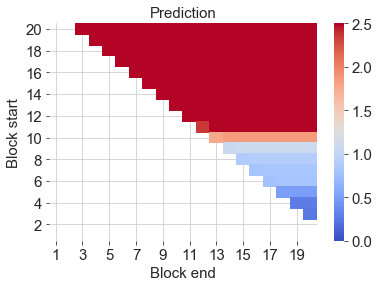

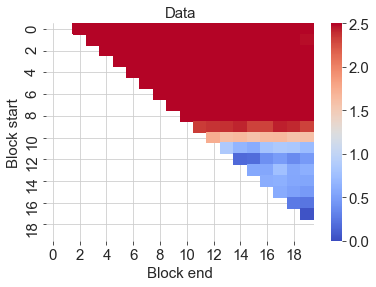

In [24]:
blockdata=pd.read_csv('../Data_ABA_Finkelsteinlab/cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-20.csv')
blockdata

_ = pltABA.predict_block_mismatches(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True,data_file=blockdata)

In [28]:
CalcABA.get_energies(Param_conc3[21:-2],[])

[3.98643167213,
 -2.86252467481,
 -4.30221922241,
 -4.57704365812,
 -4.09586733175,
 -4.71697676101,
 -4.4268971356,
 -3.34516233718,
 -4.5874652719,
 -3.30473320832,
 -3.51175881087,
 -3.33550961341,
 -3.34581938956,
 -3.50474690516,
 -3.33128018474,
 -3.52221103658,
 -9.127628411,
 -3.63466381703,
 -6.02322255423,
 -2.18386604523]